In [1]:
import re
import glob
import math
import random
import pandas as pd
import numpy as np
np.bool = np.bool_
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as py
from sklearn import datasets
from scipy import stats
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import make_blobs

%matplotlib inline

In [5]:
trainDEFSDf = pd.read_csv("F:\\UvA\\0_scriptsChemicalSpace\CocamideExtWithStartification_Fingerprints_train_predict.csv")
testDEFSDf = pd.read_csv("F:\\UvA\\0_scriptsChemicalSpace\CocamideExtWithStartification_Fingerprints_test_predict.csv")

In [6]:
trainDEFSDf.describe()

,MW,RI,RIold,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Br_B,APC2D10_Br_Br,APC2D10_Br_I,APC2D10_Br_Si,...,PCFP-r4,PCFP-r5,PCFP-r6,PCFP-r7,PCFP-r8,PCFP-r9,PCFP-r10,minAromCount,minHetrCount,predictRi
count,5015.000000,5048.000000,5048.000000,5048.0,5048.0,5048.0,5048.0,5048.000000,5048.0,5048.0,...,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000,5048.0,5048.0,5048.000000,5048.000000,5048.000000
mean,292.279064,635.927766,637.344800,0.0,0.0,0.0,0.0,0.000198,0.0,0.0,...,0.006735,0.420563,1.694731,0.039223,0.001585,0.0,0.0,1.406101,0.404715,636.125715
std,116.513802,324.430973,287.874453,0.0,0.0,0.0,0.0,0.014075,0.0,0.0,...,0.081800,0.612295,1.070025,0.196176,0.039782,0.0,0.0,1.006763,0.606119,266.255158
min,59.037114,-363.848185,-5.810000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-135.455616
25%,215.093773,397.965000,437.040000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,447.023029
50%,284.071641,619.270580,611.620000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,625.673148
75%,350.235814,853.531232,817.077500,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,1.000000,2.000000,0.000000,0.000000,0.0,0.0,2.000000,1.000000,820.798157
max,1549.713300,1988.570000,1988.570000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,...,1.000000,4.000000,5.000000,2.000000,1.000000,0.0,0.0,4.000000,3.000000,1420.622282


In [9]:
col = []
for i in trainDEFSDf.columns[4:-1]:
    col.append(i)

In [11]:
len(col)

790

In [12]:
trainDEFSDf = trainDEFSDf[col]
testDEFSDf = testDEFSDf[col]

In [13]:
trainDEFSDf

,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Br_B,APC2D10_Br_Br,APC2D10_Br_I,APC2D10_Br_Si,APC2D10_Br_X,APC2D10_C_B,APC2D10_C_Br,...,PCFP-r3,PCFP-r4,PCFP-r5,PCFP-r6,PCFP-r7,PCFP-r8,PCFP-r9,PCFP-r10,minAromCount,minHetrCount
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,3,0,0,0,0,2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,2,0,0,0,0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,2,0,0,0,0,1.0,0.0
5044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0.0,0.0
5045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1.0,0.0
5046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,2,0,0,0,0,3.0,1.0


In [14]:
def sns_heatmap(df):
    sns.heatmap(df, cmap="viridis")

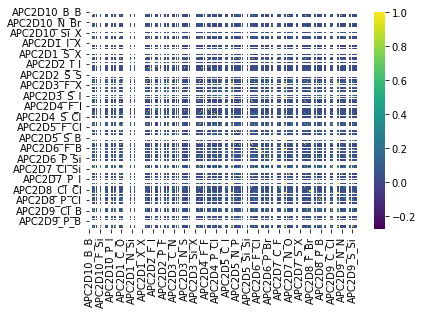

In [15]:
sns_heatmap(trainDEFSDf.corr())

In [16]:
def mz_corr(df, name):
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.rcParams["figure.dpi"] = 600

    df_corr=df.corr()
    cor_matrix =df_corr.abs()
    upper_corr = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    return upper_corr

In [23]:
trainDEFSDf_result = mz_corr(trainDEFSDf, "trainDEFSDf")
trainDEFSDf_result.to_csv("model1_trainDEFSDf.csv")

In [24]:
testDEFSDf_result = mz_corr(testDEFSDf, "testDEFSDf")
testDEFSDf_result.to_csv("model1_testDEFSDf.csv")

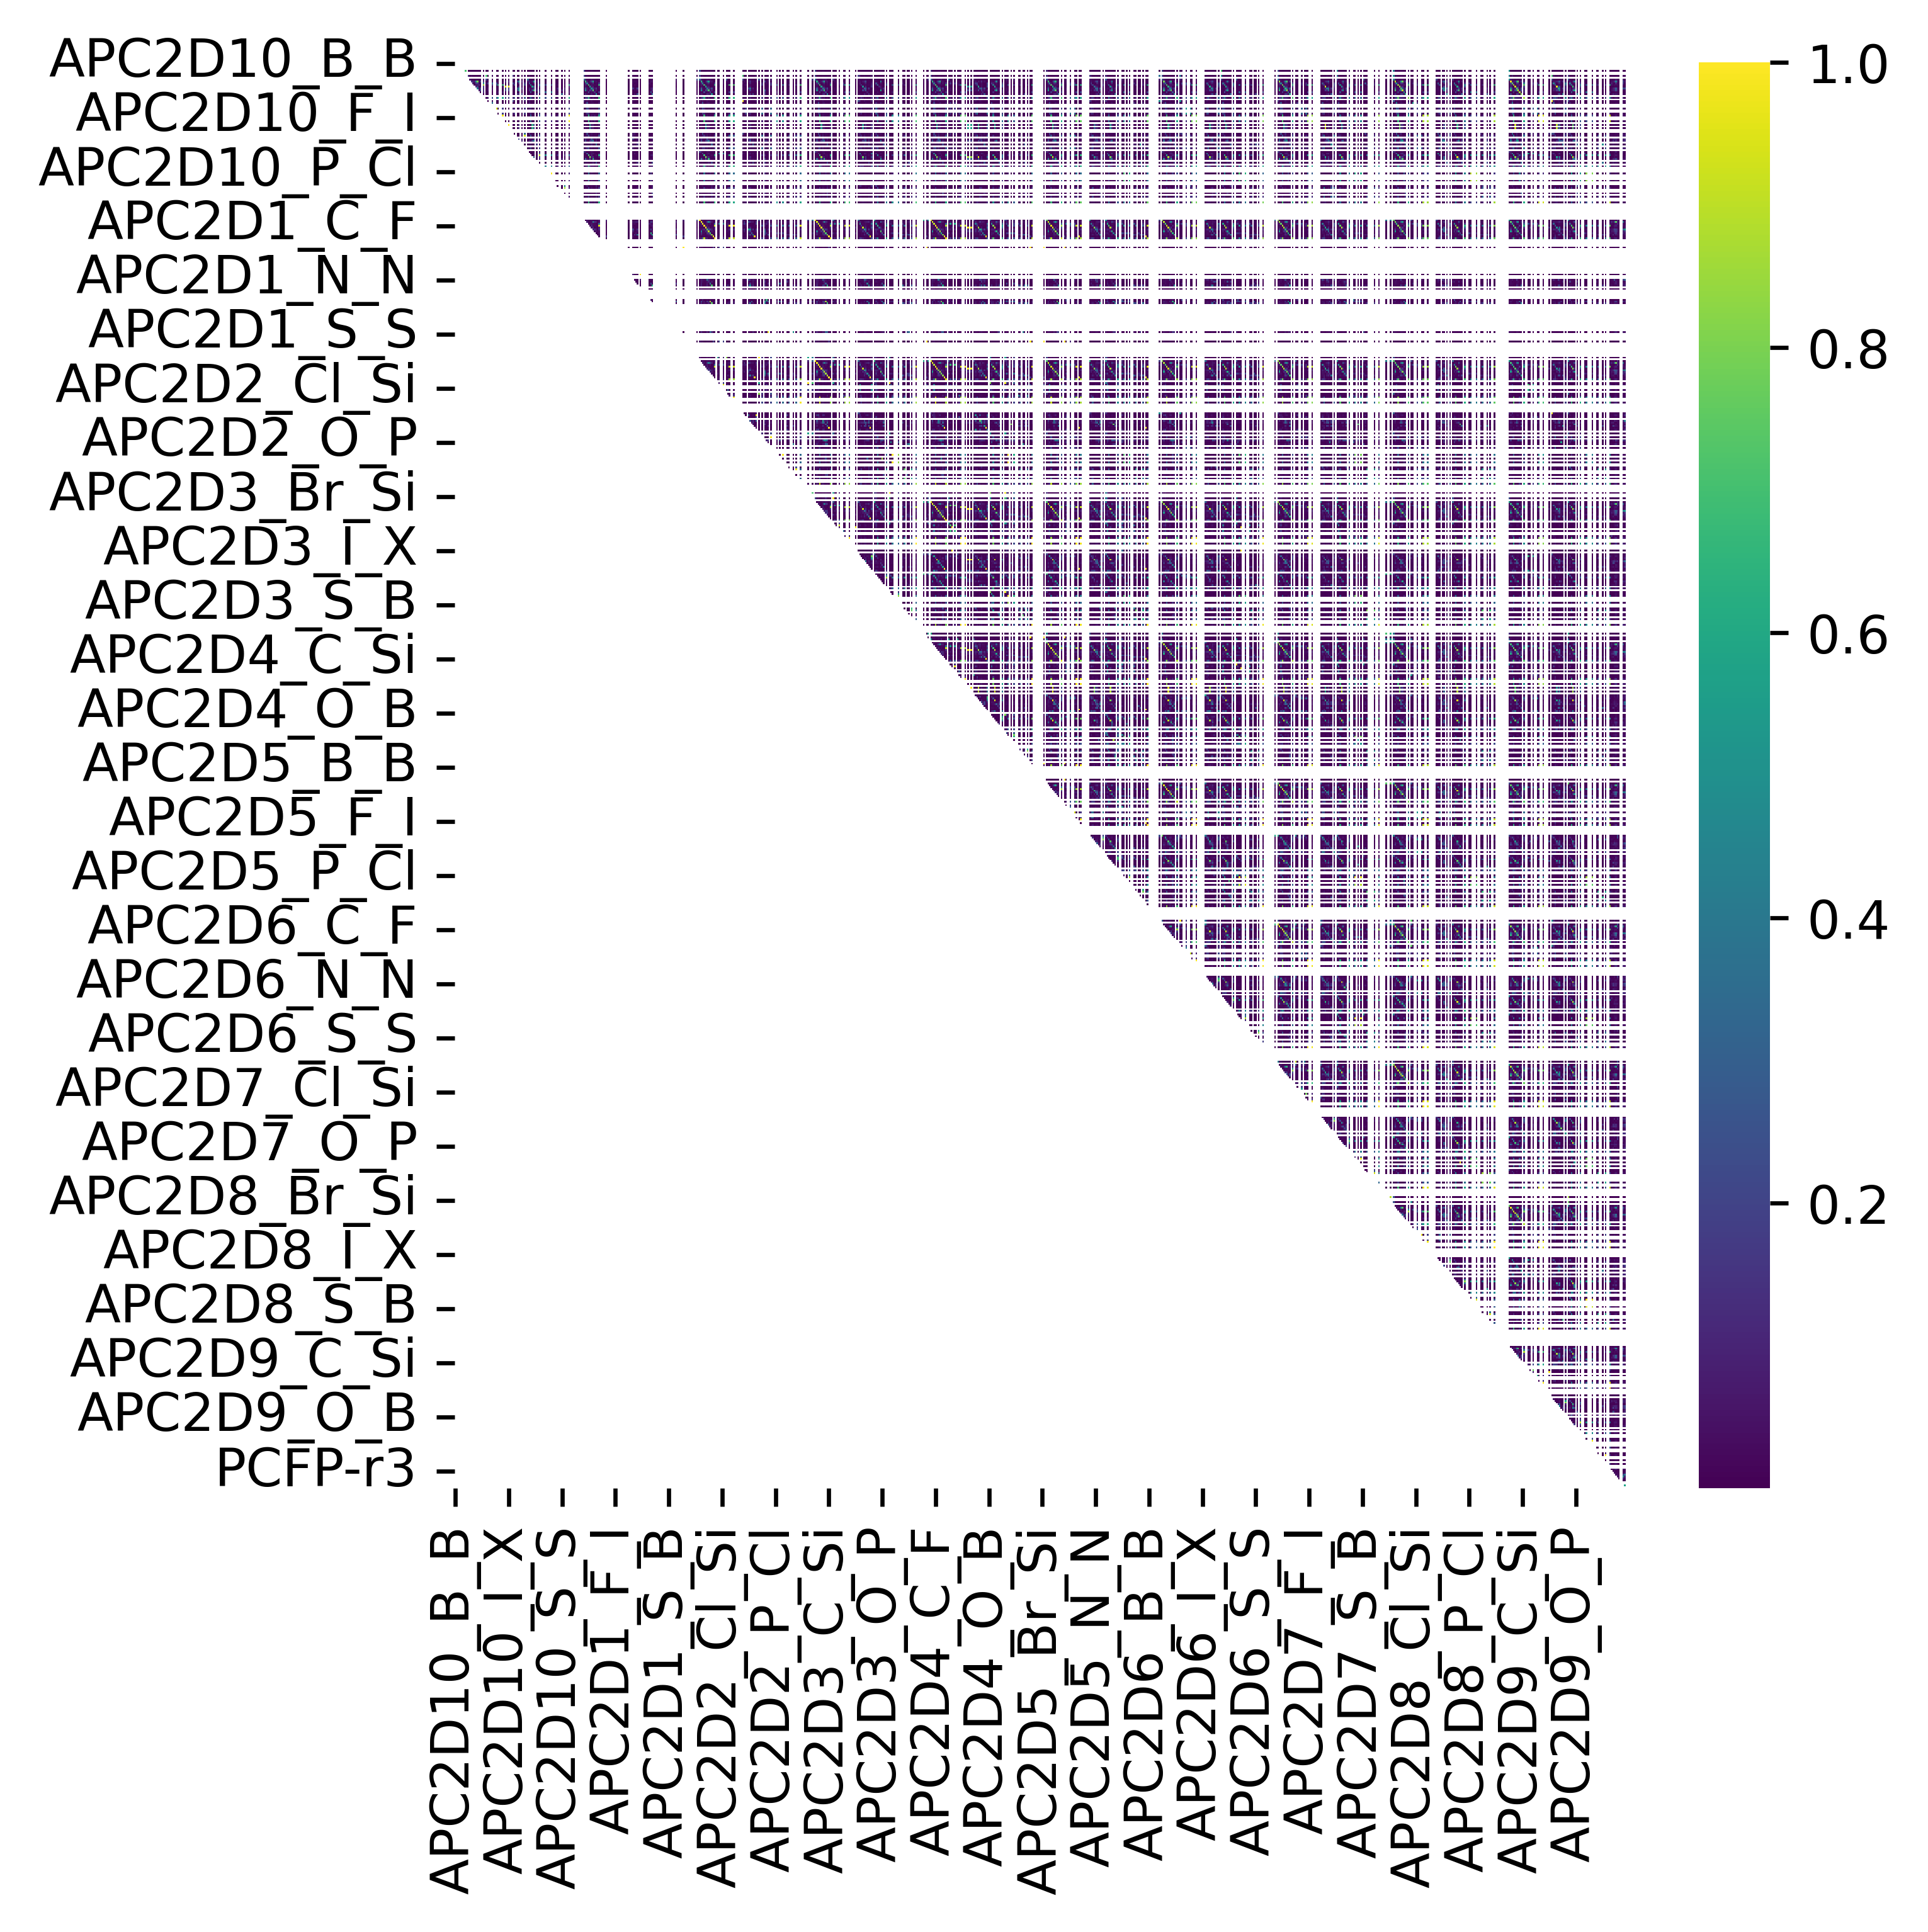

In [17]:
sns_heatmap(mz_corr(trainDEFSDf, "trainDEFSDf"))

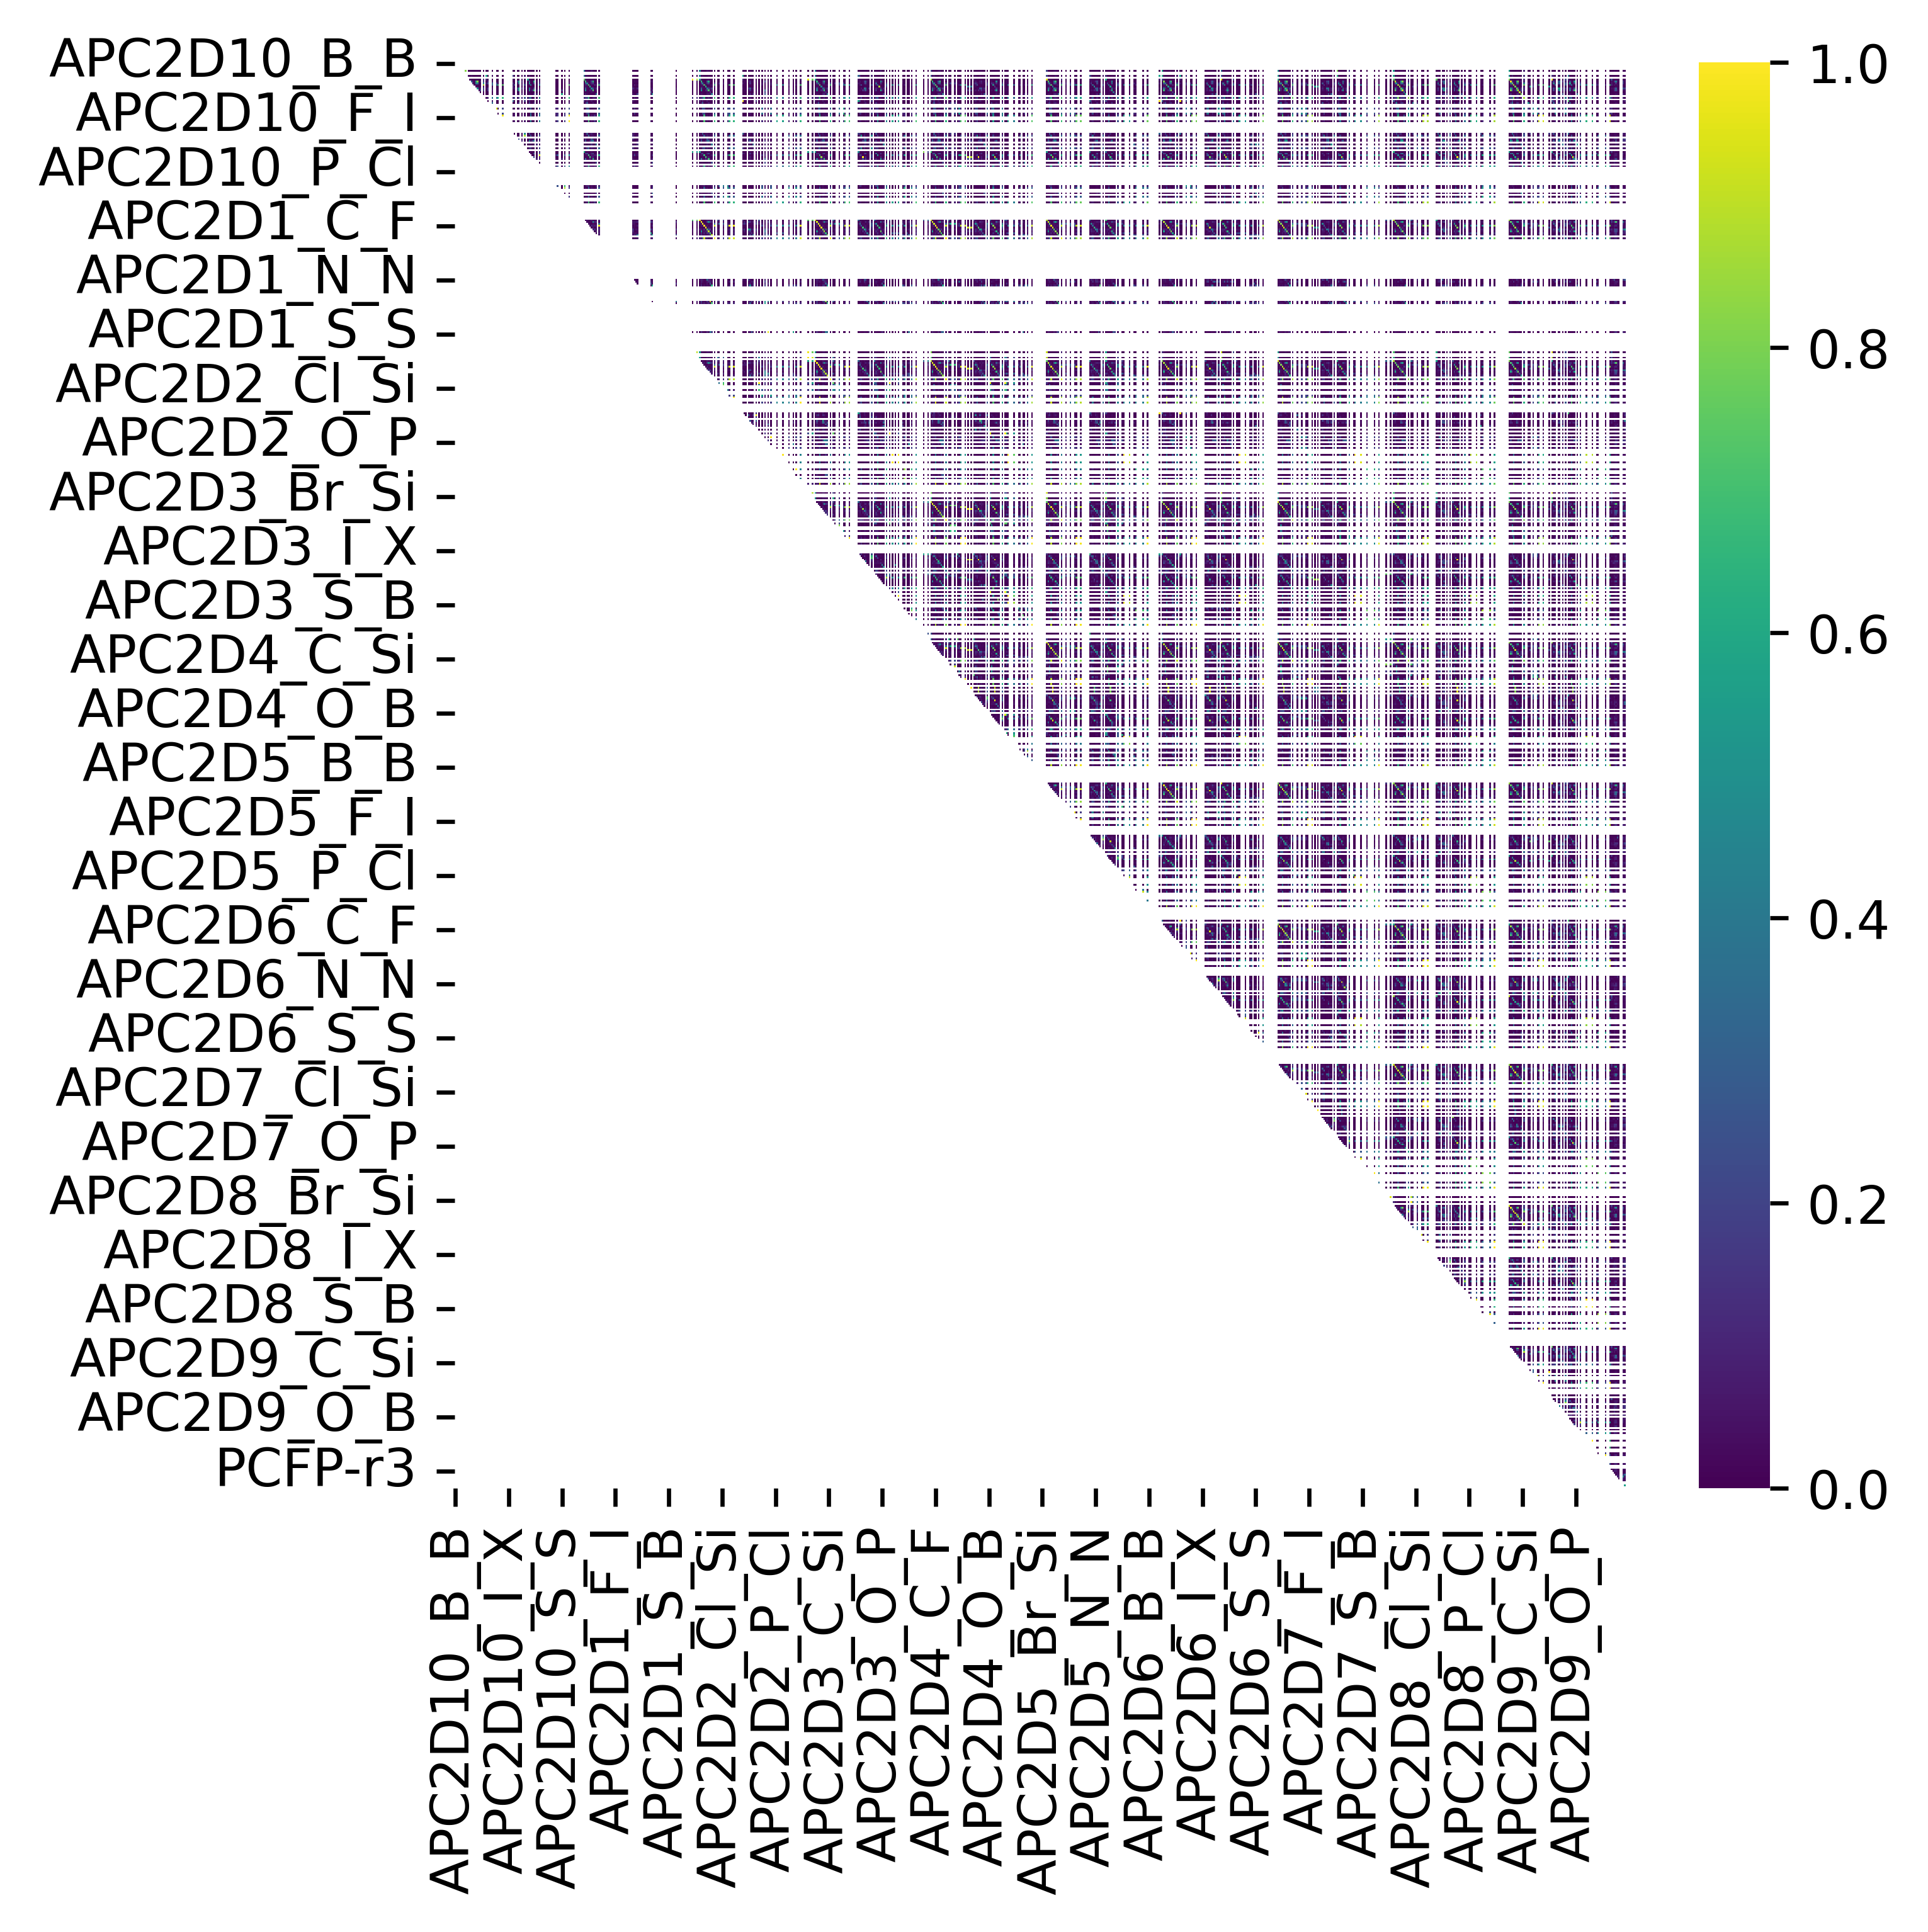

In [18]:
sns_heatmap(mz_corr(testDEFSDf, "testDEFSDf"))